**Face Detection Using OpenCV**

A simple excercise in facial detection, using 2 freely availible and appropriately licensed images online. We use a pretrained model availible through opencv, and work out some plotting of the results, as well as navigate through using google colabs vs Jupyter notebooks, as the methodology is slightly different

First, as always, we read in the data and import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cv2 import imread, CascadeClassifier, rectangle
import cv2
from google.colab.patches import cv2_imshow as imshow


In [ ]:
#first get 2 images with CC licences, a clear one, and a faded sepia one
!wget https://upload.wikimedia.org/wikipedia/commons/9/91/UAE_Team_Colombia_2020.jpg
!wget https://cdn2.picryl.com/photo/1923/12/31/first-lfls-team-1923-2b04bc-640.jpg
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2022-05-06 11:15:16--  https://upload.wikimedia.org/wikipedia/commons/9/91/UAE_Team_Colombia_2020.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182315 (178K) [image/jpeg]
Saving to: ‘UAE_Team_Colombia_2020.jpg’

UAE_Team_Colombia_2 100%[===================>] 178.04K  --.-KB/s    in 0.06s   

2022-05-06 11:15:16 (3.05 MB/s) - ‘UAE_Team_Colombia_2020.jpg’ saved [182315/182315]

--2022-05-06 11:15:16--  https://cdn2.picryl.com/photo/1923/12/31/first-lfls-team-1923-2b04bc-640.jpg
Resolving cdn2.picryl.com (cdn2.picryl.com)... 104.26.4.111, 104.26.5.111, 172.67.73.118, ...
Connecting to cdn2.picryl.com (cdn2.picryl.com)|104.26.4.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48682 (48K) [image/jpeg]
Saving to: ‘first-lfls-team-1923-2b04bc-640.jpg’

first-lfls-team-

We start with Face detection with OpenCV's cascade classifier, using OpenCV's own imread to read in the images, and a pretrained face detection library from their github repository, to detect the faces. Finally we assess the bounding boxes around the images to see how well the classifier did

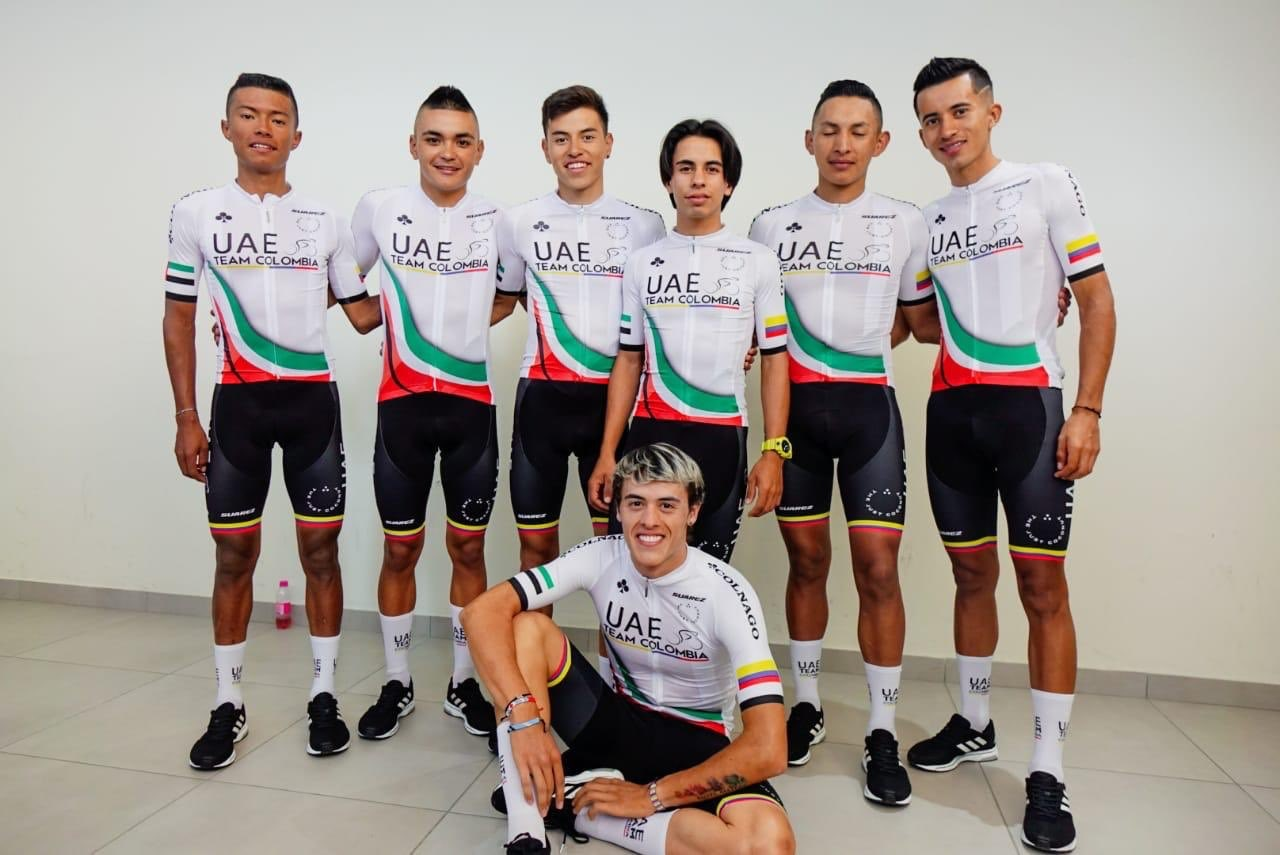

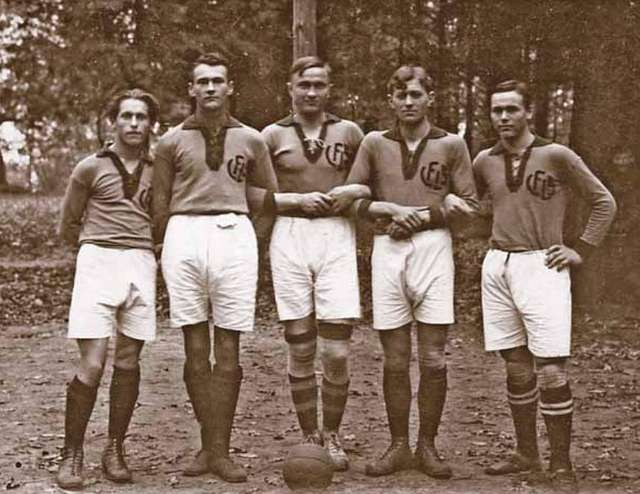

In [ ]:
# We load both the images
img1 = imread('UAE_Team_Colombia_2020.jpg')
img2 = imread('first-lfls-team-1923-2b04bc-640.jpg')

#And display them
'''The usual code is
cv2.imshow(img1)
cv2.imshow(img2)
but cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash.
hence we updated above to: from google.colab.patches import cv2_imshow as imshow
'''
imshow(img1)
imshow(img2)

In [ ]:

# now we load the pre-trained model directly into the classifier
clf = CascadeClassifier('haarcascade_frontalface_default.xml')

# next we perform face detection classification
boxes_1 = clf.detectMultiScale(img1)
boxes_2 = clf.detectMultiScale(img2)

# lastly we print the number of bounding boxes for each detected face
print("image 1:", len(boxes_1))
print("image 2:", len(boxes_2))

image 1: 8
image 2: 6


Oh dear. It appears both times, OpenCV has detected one more face than is present in the image. There are 3 approaches here:
1. We will need to tune the hyper parameters of the classifier ie scaleFactor and minNeighbors.
2. It is best to use a different classifier for each image, as the optimal parameters will be different. We have dont this already
3. In another use/detection case, if the above didn't work, we might consider retraining our model for better accuracy. Since this is a long process, it is ideal to use a pretrained one if possible

In addition, it best to plot the results now, so that even if the right number of bounding boxes are returned, we can see how well they fit the faces.

We use opencv's rectangle tool for the bounding box plots, and matplotlib for showing the image, since the cv2.imshow class doesn't work properly in colabs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


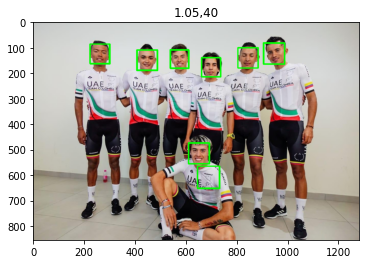

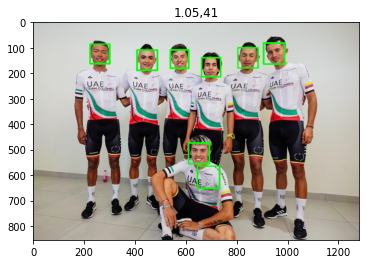

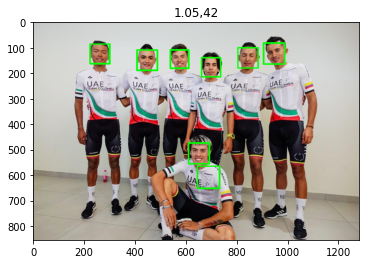

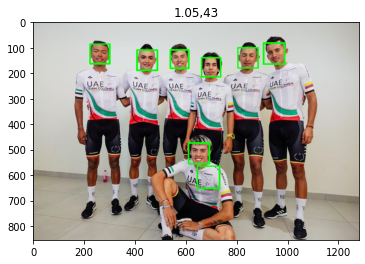

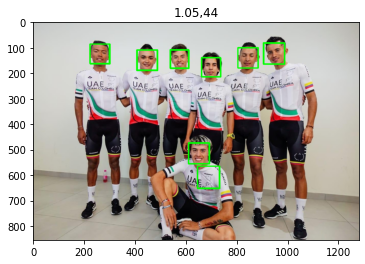

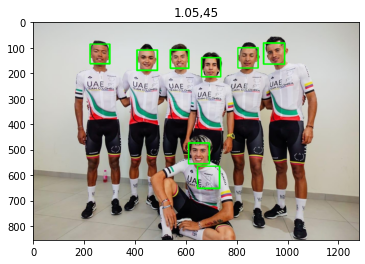

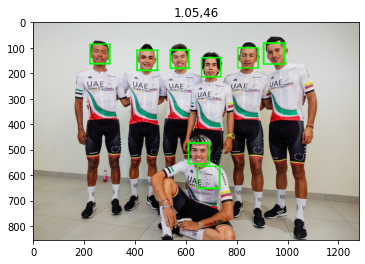

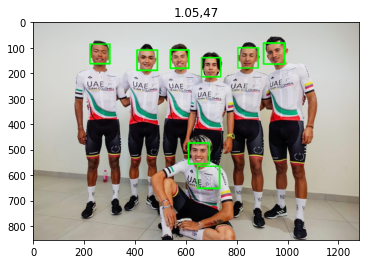

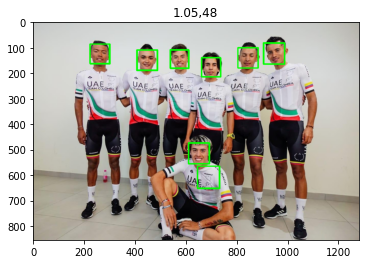

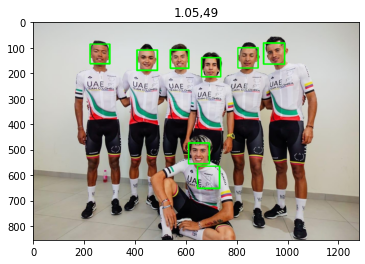

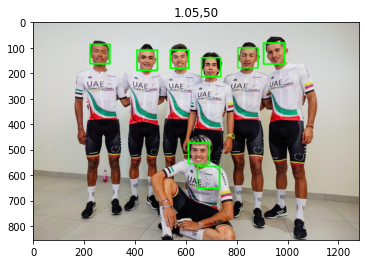

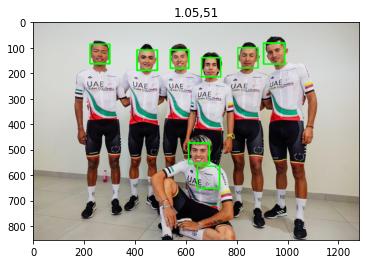

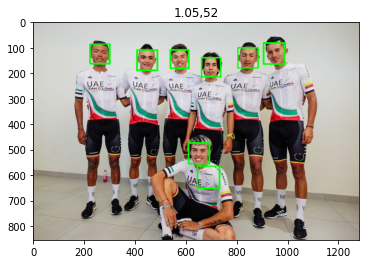

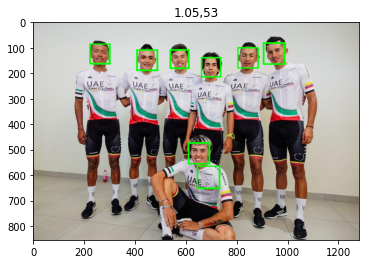

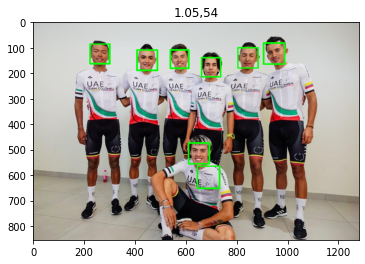

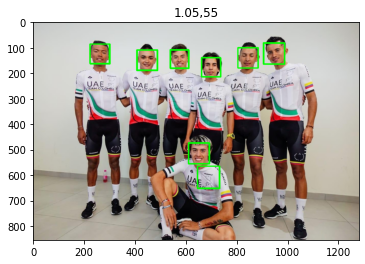

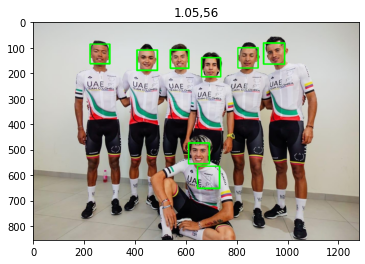

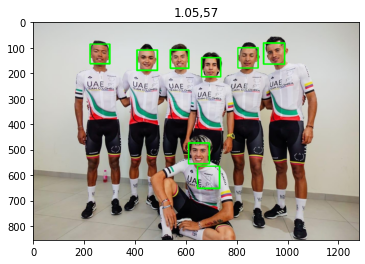

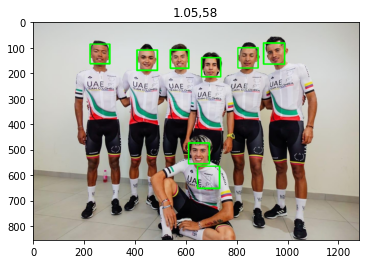

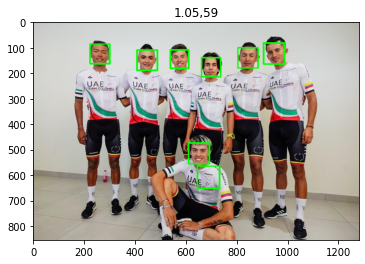

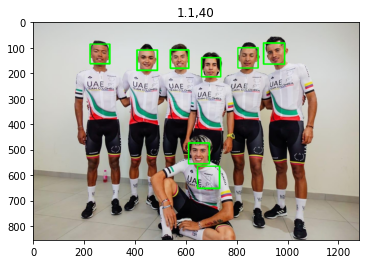

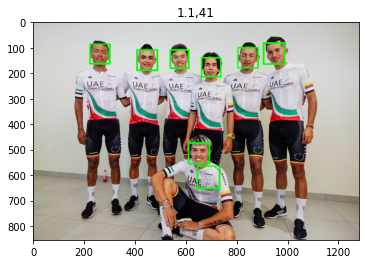

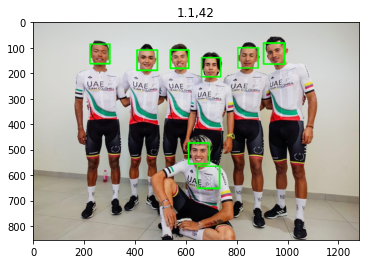

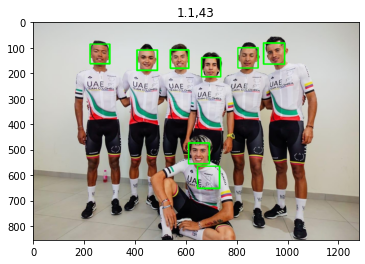

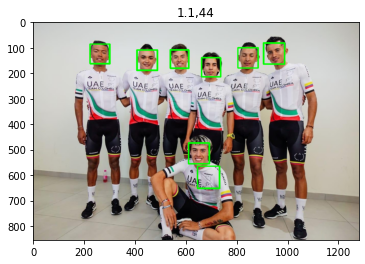

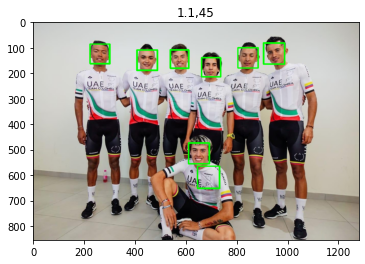

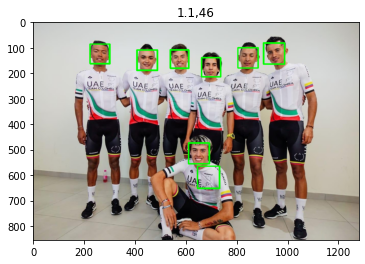

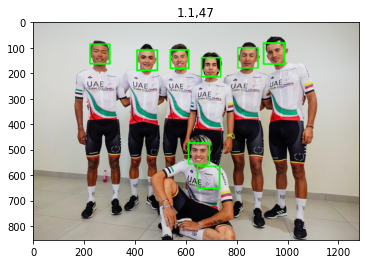

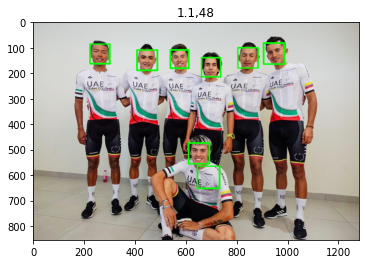

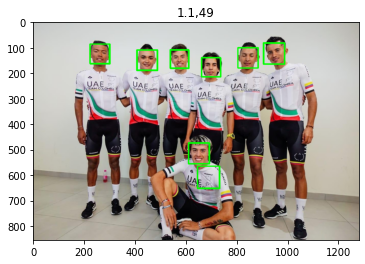

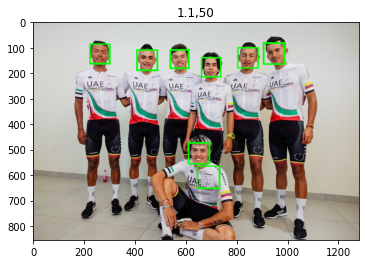

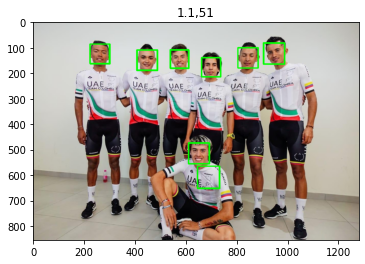

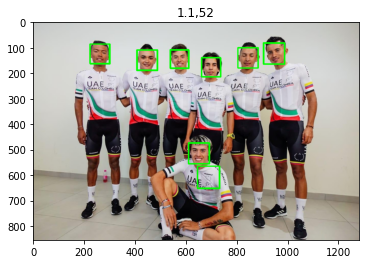

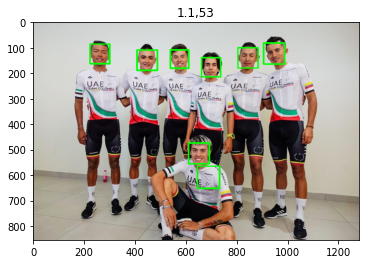

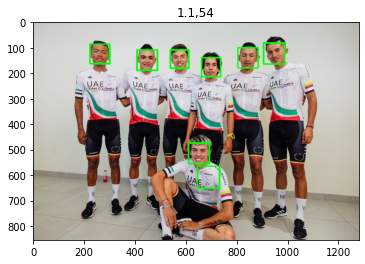

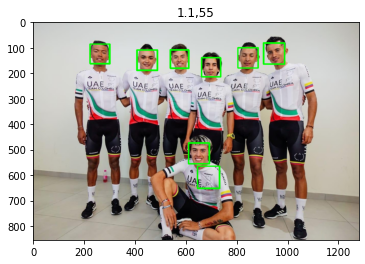

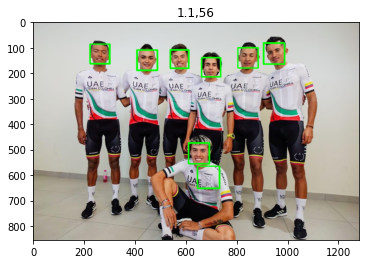

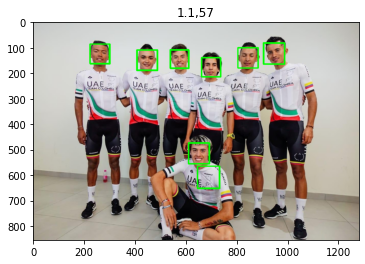

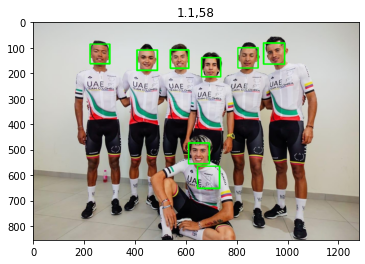

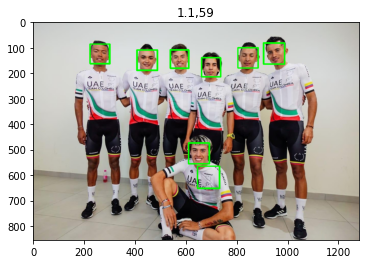

In [ ]:
#For Image 1
#Adjust the classifier with custom hyperparameters
for s in [1.05,1.1,]:
  for m in range(40,60):
    boxes_1 = clf.detectMultiScale(img1, s, m)

  #Print the bounding boxes onto the image
    for n in boxes_1:
      x_coord, y_coord, width, height = n # unpacks values of each box
      x_coord2, y_coord2 = (x_coord + width), (y_coord + height) # created 4 points for a rectangle
      rectangle(img1, (x_coord, y_coord), (x_coord2, y_coord2), (0,255,0), 3) # draw rectangle, specifiy colour and thickness

    #Open CV needs you to create a 'Window' in order to resize an image. This function is not availible in colabs
    #instead we can use matplotlib to make a smaller image [easier to vue on a notebook]
    #matplot lib interprets in RGB but openCV reads in BGR, so we need to convert the image first
    rgb_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb_img1)
    plt.title(f"{s},{m}")

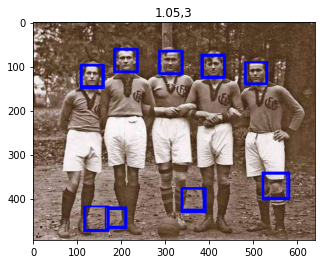

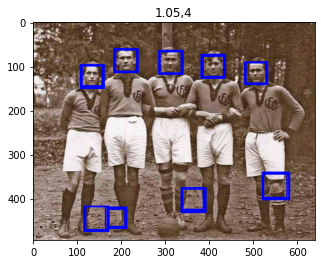

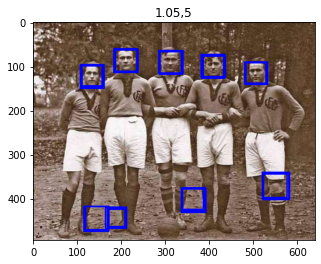

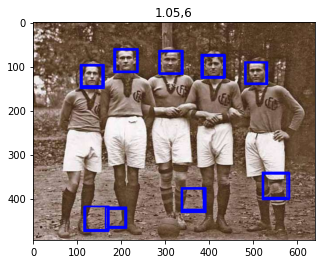

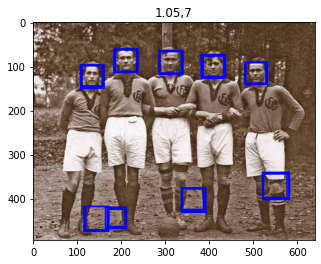

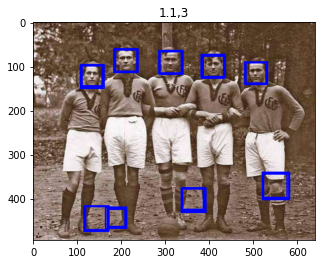

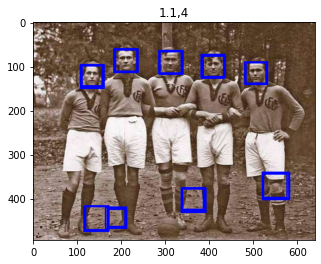

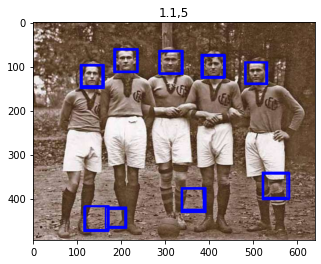

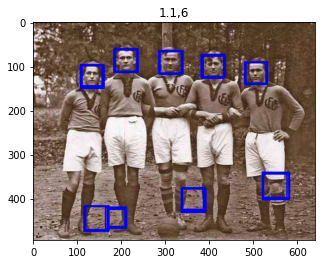

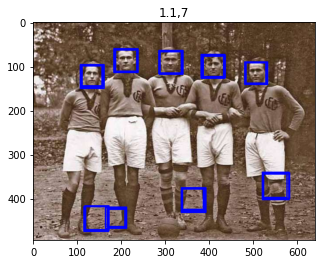

In [ ]:
#For Image 2
#Adjust the classifier with custom hyperparameters
for s in [1.05, 1.1]:
  for m in range(3,8):
    boxes_2 = clf.detectMultiScale(img2, s, m)

  #Print the bounding boxes onto the image
    for n in boxes_2:
      x_coord, y_coord, width, height = n # unpacks values of each box
      x_coord2, y_coord2 = (x_coord + width), (y_coord + height) # created 4 points for a rectangle
      rectangle(img2, (x_coord, y_coord), (x_coord2, y_coord2), (255,0,0), 2) # draw rectangle, specifiy colour and thickness

    #Open CV needs you to create a 'Window' in order to resize an image. This function is not availible in colabs
    #instead we can use matplotlib to make a smaller image [easier to vue on a notebook]
    #matplot lib interprets in RGB but openCV reads in BGR, so we need to convert the image first
    rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb_img2)
    plt.title(f"{s},{m}")

So we ran both photos with a whole range of parameters and... they kinda sucked! Confusingly, image 2 is now showing even more faces than previously, which may in part be due to the stochastic nature of the algorithm
So we have 3 options left.
1. Run a much wider range of hyper parameters
2. Train a model ourselves, perhaps with more data, to get a better result
3. Try a different package....

enter MTCNN, a convolutional nueral network! The details of this will be in the next notebook!